### Moran, Kasey

# Predicting Employee Attrition

In this notebook, I will build up models to predict whether an employee will leave their current company.

In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import ast

import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from pdpbox.pdp import pdp_isolate, pdp_plot
from sklearn.metrics import accuracy_score

%matplotlib inline

# Data Exploration


In [2]:
employees = pd.read_csv("EmployeeAttrition.csv")
print(employees.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### I am removing the following columns: EmployeeCount, EmployeeNumber, Over18, StandardHours, DailyRate, HourlyRate and MonthlyRate. MonthlyIncome is the only salary related variable to stay.

In [3]:
keeplist = ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
df = employees[keeplist].dropna()

In [4]:
# print the information of the dataset
print(df.info())

# print # of rows, # of columns
print(df.shape)

# print the first five rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   BusinessTravel            1470 non-null   object
 2   Department                1470 non-null   object
 3   Education                 1470 non-null   int64 
 4   EducationField            1470 non-null   object
 5   EnvironmentSatisfaction   1470 non-null   int64 
 6   Gender                    1470 non-null   object
 7   JobInvolvement            1470 non-null   int64 
 8   JobLevel                  1470 non-null   int64 
 9   JobRole                   1470 non-null   object
 10  JobSatisfaction           1470 non-null   int64 
 11  MaritalStatus             1470 non-null   object
 12  MonthlyIncome             1470 non-null   int64 
 13  NumCompaniesWorked        1470 non-null   int64 
 14  OverTime                

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,Travel_Rarely,Sales,2,Life Sciences,2,Female,3,2,Sales Executive,...,3,1,0,8,0,1,6,4,0,5
1,No,Travel_Frequently,Research & Development,1,Life Sciences,3,Male,2,2,Research Scientist,...,4,4,1,10,3,3,10,7,1,7
2,Yes,Travel_Rarely,Research & Development,2,Other,4,Male,2,1,Laboratory Technician,...,3,2,0,7,3,3,0,0,0,0
3,No,Travel_Frequently,Research & Development,4,Life Sciences,4,Female,3,1,Research Scientist,...,3,3,0,8,3,3,8,7,3,0
4,No,Travel_Rarely,Research & Development,1,Medical,1,Male,3,1,Laboratory Technician,...,3,4,1,6,3,3,2,2,2,2


# Data Cleansing

In [5]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [6]:
df.loc[df["Attrition"] == "Yes", "Attrition"] = 1
df.loc[df["Attrition"] == "No", "Attrition"] = 0
df['Attrition'] = df['Attrition'].astype(int)
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

### Converting non-numeric variables

In [7]:
df['BusinessTravel'].value_counts()


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [8]:
df.loc[df["BusinessTravel"] == "Travel_Frequently", "BusinessTravel"] = 2
df.loc[df["BusinessTravel"] == "Travel_Rarely", "BusinessTravel"] = 1 
df.loc[df["BusinessTravel"] == "Non-Travel", "BusinessTravel"] = 0
df['BusinessTravel'] = df['BusinessTravel'].astype(int)
df['BusinessTravel'].value_counts()

1    1043
2     277
0     150
Name: BusinessTravel, dtype: int64

In [9]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [10]:
df.loc[df["Department"] == "Research & Development", "Department"] = 2
df.loc[df["Department"] == "Sales", "Department"] = 1 
df.loc[df["Department"] == "Human Resources", "Department"] = 0 
df['Department'] = df['Department'].astype(int)
df['Department'].value_counts()

2    961
1    446
0     63
Name: Department, dtype: int64

In [11]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [12]:
df.loc[df["EducationField"] == "Life Sciences", "EducationField"] = 5
df.loc[df["EducationField"] == "Medical", "EducationField"] = 4
df.loc[df["EducationField"] == "Marketing", "EducationField"] = 3
df.loc[df["EducationField"] == "Technical Degree", "EducationField"] = 2 
df.loc[df["EducationField"] == "Human Resources", "EducationField"] = 1
df.loc[df["EducationField"] == "Other", "EducationField"] = 0
df['EducationField'] = df['EducationField'].astype(int)
df['EducationField'].value_counts()

5    606
4    464
3    159
2    132
0     82
1     27
Name: EducationField, dtype: int64

In [13]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [14]:
df.loc[df["Gender"] == "Male", "Gender"] = 1 
df.loc[df["Gender"] == "Female", "Gender"] = 0
df['Gender'] = df['Gender'].astype(int)
df['Gender'].value_counts()

1    882
0    588
Name: Gender, dtype: int64

In [15]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [16]:
df.loc[df["JobRole"] == "Sales Executive", "JobRole"] = 8
df.loc[df["JobRole"] == "Research Scientist", "JobRole"] = 7
df.loc[df["JobRole"] == "Laboratory Technician", "JobRole"] = 6
df.loc[df["JobRole"] == "Manufacturing Director", "JobRole"] = 5
df.loc[df["JobRole"] == "Healthcare Representative", "JobRole"] = 4
df.loc[df["JobRole"] == "Manager", "JobRole"] = 3
df.loc[df["JobRole"] == "Sales Representative", "JobRole"] = 2 
df.loc[df["JobRole"] == "Research Director", "JobRole"] = 1 
df.loc[df["JobRole"] == "Human Resources", "JobRole"] = 0
df['JobRole'] = df['JobRole'].astype(int)
df['JobRole'].value_counts()

8    326
7    292
6    259
5    145
4    131
3    102
2     83
1     80
0     52
Name: JobRole, dtype: int64

In [17]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [18]:
df.loc[df["MaritalStatus"] == "Married", "MaritalStatus"] = 2 
df.loc[df["MaritalStatus"] == "Single", "MaritalStatus"] = 0
df.loc[df["MaritalStatus"] == "Divorced", "MaritalStatus"] = 1
df['MaritalStatus'] = df['MaritalStatus'].astype(int)
df['MaritalStatus'].value_counts()

2    673
0    470
1    327
Name: MaritalStatus, dtype: int64

In [19]:
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [20]:
df.loc[df["OverTime"] == "Yes", "OverTime"] = 1 
df.loc[df["OverTime"] == "No", "OverTime"] = 0
df['OverTime'] = df['OverTime'].astype(int)
df['OverTime'].value_counts()

0    1054
1     416
Name: OverTime, dtype: int64

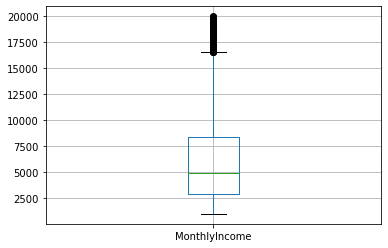

In [21]:
#checking any income outliers
box = employees[['MonthlyIncome']].boxplot()

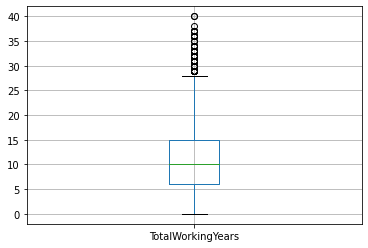

In [22]:
#checking any TotalWorkingYears outliers
box = employees[['TotalWorkingYears']].boxplot()

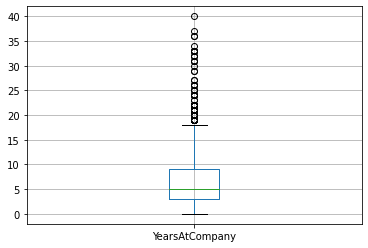

In [23]:
#checking any YearsAtCompany outliers
box = employees[['YearsAtCompany']].boxplot()

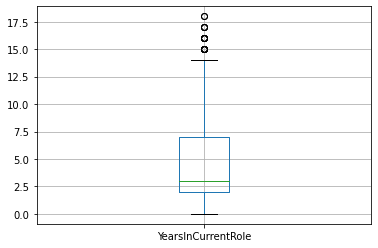

In [24]:
#checking any YearsInCurrentRole outliers
box = employees[['YearsInCurrentRole']].boxplot()

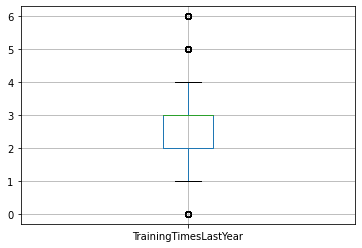

In [25]:
#checking any TrainingTimesLastYear outliers
box = employees[['TrainingTimesLastYear']].boxplot()

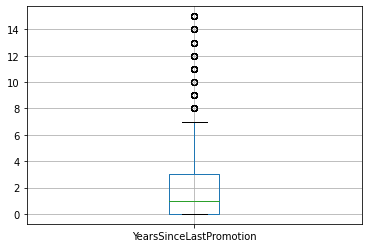

In [26]:
#checking any YearsSinceLastPromotion outliers
box = employees[['YearsSinceLastPromotion']].boxplot()

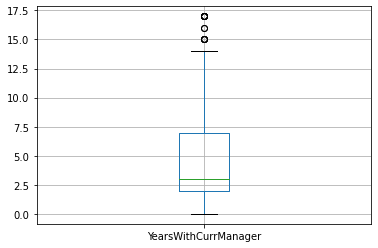

In [27]:
#checking any YearsWithCurrManager outliers
box = employees[['YearsWithCurrManager']].boxplot()

# Classification

In [28]:
# define the predictors
x_columns = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

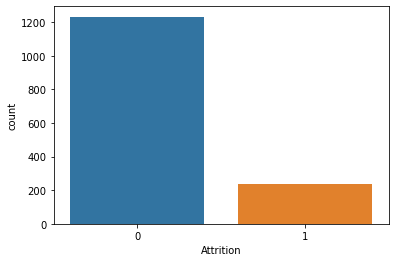

In [29]:
# Plot the distribution of the y variable
sns.countplot(df.Attrition, label="Count")
df['Attrition'].value_counts(normalize=True) #normalize = true is percentage counts, standard without norm is # counts

### SMOTE 

In [30]:
from imblearn.over_sampling import (SMOTE)

oversample = SMOTE()
X2, y2 = oversample.fit_resample(df[x_columns], df['Attrition'])

print('SMOTE {}'.format(Counter(y2)))

SMOTE Counter({1: 1233, 0: 1233})


In [31]:
X = pd.DataFrame(X2, columns=x_columns)
y = pd.DataFrame(y2, columns = ['Attrition'])

# combine the columns in X and y to form the new oversampled dataset
dfnew = pd.concat([X, y], axis=1)

In [32]:
# Plot the distribution of the y variable
y.value_counts()

Attrition
0            1233
1            1233
dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

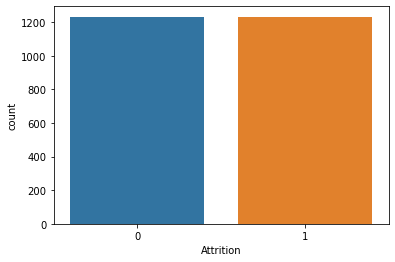

In [33]:
sns.countplot(y.Attrition, label="Count")

In [34]:
#split the dataset for cross validation

X_train, X_test, y_train, y_test = train_test_split\
  (X, y, train_size = 0.7, random_state = 1)

## Logistic Regression

In [35]:
#build logistic regression model

import statsmodels.discrete.discrete_model as sm
logit = sm.Logit(y_train, X_train)
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.427004
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1726
Model:                          Logit   Df Residuals:                     1701
Method:                           MLE   Df Model:                           24
Date:                Thu, 01 Dec 2022   Pseudo R-squ.:                  0.3836
Time:                        21:35:50   Log-Likelihood:                -737.01
converged:                       True   LL-Null:                       -1195.7
Covariance Type:            nonrobust   LLR p-value:                2.998e-178
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
BusinessTravel               0.7620      0.145      5.260      0.000       0.478       1.046
Department                  -0.7271      0.121     -6.016      0.000      -0.964      -0.490
Education                   -0.0017      0.068     -0.025      0.980      -0.135       0.132
EducationField              -0.1028      0.049     -2.082      0.037      -0.200      -0.006
EnvironmentSatisfaction     -0.4641      0.064     -7.230      0.000      -0.590      -0.338
Gender                      -0.1792      0.133     -1.352      0.176      -0.439       0.081
JobInvolvement              -0.5608      0.092     -6.099      0.000      -0.741      -0.381
JobLevel                    -0.2441      0.213     -1.148      0.251      -0.661       0.173
JobRole                      0.1644      0.033      5.032      0.000       0.100       0.228
JobSatisfaction             -0.4734      0.064     -7.353      0.000      -0.600      -0.347
MaritalStatus               -0.4322      0.091     -4.741      0.000      -0.611      -0.253
MonthlyIncome             2.854e-05   5.14e-05      0.556      0.578   -7.21e-05       0.000
NumCompaniesWorked           0.1002      0.033      3.050      0.002       0.036       0.165
OverTime                     1.2290      0.152      8.103      0.000       0.932       1.526
PercentSalaryHike           -0.1040      0.025     -4.101      0.000      -0.154      -0.054
PerformanceRating            2.8352      0.224     12.654      0.000       2.396       3.274
RelationshipSatisfaction    -0.3780      0.064     -5.883      0.000      -0.504      -0.252
StockOptionLevel            -0.7292      0.110     -6.601      0.000      -0.946      -0.513
TotalWorkingYears           -0.0746      0.019     -3.853      0.000      -0.113      -0.037
TrainingTimesLastYear       -0.2872      0.058     -4.979      0.000      -0.400      -0.174
WorkLifeBalance             -0.3310      0.090     -3.664      0.000      -0.508      -0.154
YearsAtCompany               0.1403      0.026      5.321      0.000       0.089       0.192
YearsInCurrentRole          -0.1744      0.037     -4.666      0.000      -0.248      -0.101
YearsSinceLastPromotion      0.1047      0.032      3.290      0.001       0.042       0.167
YearsWithCurrManager        -0.1893      0.037     -5.167      0.000      -0.261      -0.118
============================================================================================
"""

In [36]:
from sklearn.linear_model import LogisticRegression

#build logistic regression model w/training dataset
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#prediction for test dataset
y_pred_logit = logreg.predict(X_test)

### Logistic Regression Model Evaluation

In [37]:
#confusion matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_logit).ravel()
print(tn, fp, fn, tp)

confusion_matrix(y_test, y_pred_logit)

265 81 134 260


array([[265,  81],
       [134, 260]])

In [38]:
#Accuracy, sensitivity & specificty
print("Accuracy = %s" %((tp+tn)/(tp+fn+tn+fp)))
print("Sensitivity = %s" %(tp/(tp+fn)))
print("Specificity = %s" %(tn/(tn+fp)))

Accuracy = 0.7094594594594594
Sensitivity = 0.6598984771573604
Specificity = 0.7658959537572254


In [39]:
#Precision, recall & F1_score
print(classification_report(y_test, y_pred_logit))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       346
           1       0.76      0.66      0.71       394

    accuracy                           0.71       740
   macro avg       0.71      0.71      0.71       740
weighted avg       0.72      0.71      0.71       740



AUC= 0.7953185059123853


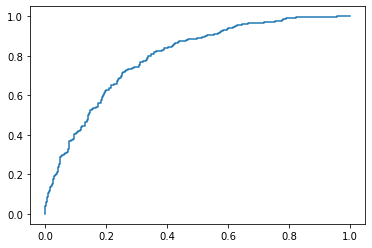

In [40]:
#Calculate AUC
y_pred_prob = logreg.predict_proba(X_test)[:,1]
print("AUC=", roc_auc_score(y_test, y_pred_prob))

#Plot ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)

## Decision Tree Model

In [41]:
clftree = DecisionTreeClassifier(max_depth = 3)
clftree.fit(X_train, y_train)

y_pred_tree = clftree.predict(X_test)

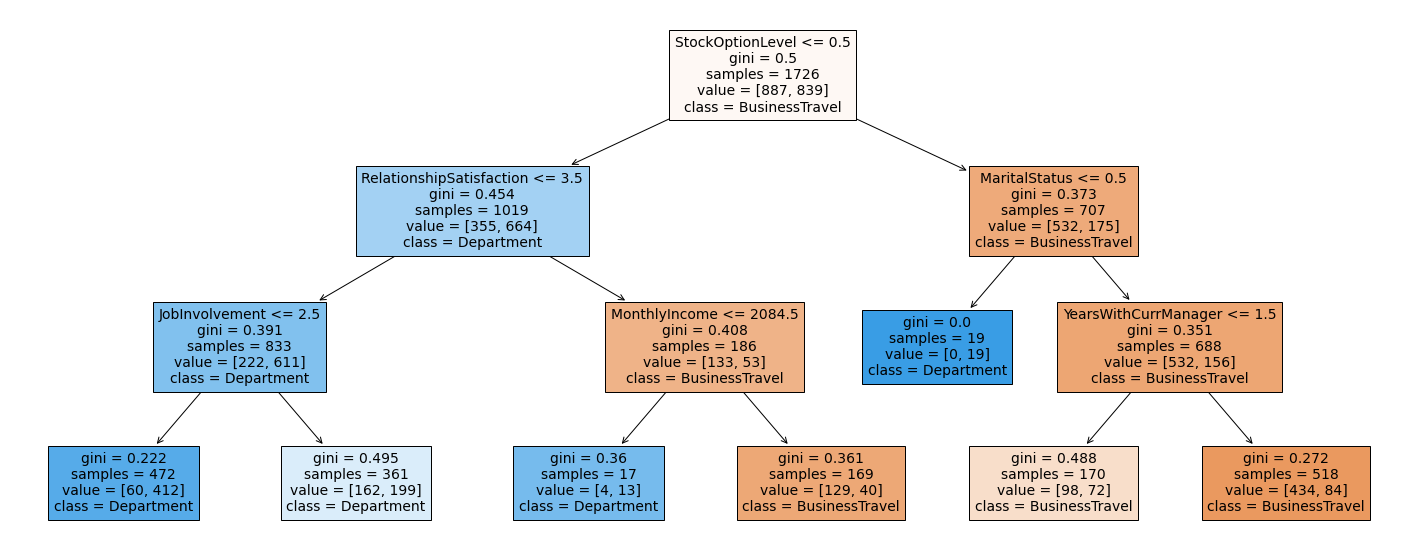

In [42]:
plt.figure(figsize=(25, 10))
tree.plot_tree(clftree, feature_names=x_columns, class_names=['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], filled = True)
plt.show()

[('BusinessTravel', 0.0), ('Department', 0.0), ('Education', 0.0), ('EducationField', 0.0), ('EnvironmentSatisfaction', 0.0), ('Gender', 0.0), ('JobInvolvement', 0.1469332475410586), ('JobLevel', 0.0), ('JobRole', 0.0), ('JobSatisfaction', 0.0), ('MaritalStatus', 0.0767642087360157), ('MonthlyIncome', 0.029902834386189375), ('NumCompaniesWorked', 0.0), ('OverTime', 0.0), ('PercentSalaryHike', 0.0), ('PerformanceRating', 0.0), ('RelationshipSatisfaction', 0.21241723425332024), ('StockOptionLevel', 0.4732693842889159), ('TotalWorkingYears', 0.0), ('TrainingTimesLastYear', 0.0), ('WorkLifeBalance', 0.0), ('YearsAtCompany', 0.0), ('YearsInCurrentRole', 0.0), ('YearsSinceLastPromotion', 0.0), ('YearsWithCurrManager', 0.060713090794500164)]


<AxesSubplot:>

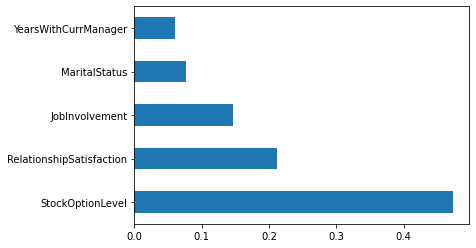

In [43]:
#Print list of the features and their importance scores
print(list(zip(X_train, clftree.feature_importances_)))

#Plot the important features
feat_importances = pd.Series(clftree.feature_importances_, index=x_columns)
feat_importances.nlargest(5).plot(kind='barh')

### Decision Tree Model Evaluation

In [44]:
#confusion matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_tree).ravel()
print(tn, fp, fn, tp)

confusion_matrix(y_test, y_pred_tree)

260 86 116 278


array([[260,  86],
       [116, 278]])

In [45]:
#Sensitivity & specificty
print("Accuracy = %s" %((tp+tn)/(tp+fn+tn+fp)))
print("Sensitivity = %s" %(tp/(tp+fn)))
print("Specificity = %s" %(tn/(tn+fp)))

Accuracy = 0.727027027027027
Sensitivity = 0.7055837563451777
Specificity = 0.7514450867052023


In [46]:
#Precision, recall & F1_score
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72       346
           1       0.76      0.71      0.73       394

    accuracy                           0.73       740
   macro avg       0.73      0.73      0.73       740
weighted avg       0.73      0.73      0.73       740



AUC= 0.7834753968486841


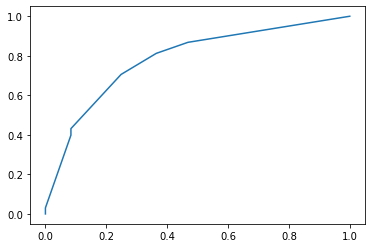

In [47]:
#ROC and AUC

#Calculate AUC
y_pred_prob_tree = clftree.predict_proba(X_test)[:,1]

print("AUC=", roc_auc_score(y_test, y_pred_prob_tree))

# plot ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_tree)
plt.plot(fpr, tpr)

## Random Forest Models

In [48]:
#Print accuracy for each model

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor

# play around with the setting for max_features
for i in range(1, 26):
    rfc = RandomForestClassifier(max_features=i, random_state=1)
    rfc.fit(X_train, y_train)
    pred_rfc = rfc.predict(X_test)
    print("Accuracy for %s feature(s) equals %s" %(i, accuracy_score(y_test, pred_rfc)))

Accuracy for 1 feature(s) equals 0.9067567567567567
Accuracy for 2 feature(s) equals 0.9067567567567567
Accuracy for 3 feature(s) equals 0.9054054054054054
Accuracy for 4 feature(s) equals 0.9054054054054054
Accuracy for 5 feature(s) equals 0.9081081081081082
Accuracy for 6 feature(s) equals 0.9067567567567567
Accuracy for 7 feature(s) equals 0.9067567567567567
Accuracy for 8 feature(s) equals 0.9
Accuracy for 9 feature(s) equals 0.9081081081081082
Accuracy for 10 feature(s) equals 0.9027027027027027
Accuracy for 11 feature(s) equals 0.9027027027027027
Accuracy for 12 feature(s) equals 0.9108108108108108
Accuracy for 13 feature(s) equals 0.9054054054054054
Accuracy for 14 feature(s) equals 0.9013513513513514
Accuracy for 15 feature(s) equals 0.9027027027027027
Accuracy for 16 feature(s) equals 0.904054054054054
Accuracy for 17 feature(s) equals 0.9094594594594595
Accuracy for 18 feature(s) equals 0.9027027027027027
Accuracy for 19 feature(s) equals 0.9027027027027027
Accuracy for 20 fe

In [90]:
#Using 12 features yeilds the best accuracy
#Using 5 features yeields a similar accuracy but is simpler for the purposes of this project
rfc5 = RandomForestClassifier(max_features=5, random_state=11)
rfc5.fit(X_train, y_train)
y_pred_rfc5 = rfc5.predict(X_test)

In [73]:
#confusion matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rfc5).ravel()
print(tn, fp, fn, tp)

confusion_matrix(y_test, y_pred_rfc5)

328 18 51 343


array([[328,  18],
       [ 51, 343]])

In [74]:
#Accuracy, sensitivity & specificty
print("Accuracy = %s" %((tp+tn)/(tp+fn+tn+fp)))
print("Sensitivity = %s" %(tp/(tp+fn)))
print("Specificity = %s" %(tn/(tn+fp)))
    
#Precision, recall & F1_score
print(classification_report(y_test, y_pred_rfc5))

Accuracy = 0.9067567567567567
Sensitivity = 0.8705583756345178
Specificity = 0.9479768786127167
              precision    recall  f1-score   support

           0       0.87      0.95      0.90       346
           1       0.95      0.87      0.91       394

    accuracy                           0.91       740
   macro avg       0.91      0.91      0.91       740
weighted avg       0.91      0.91      0.91       740



<AxesSubplot:>

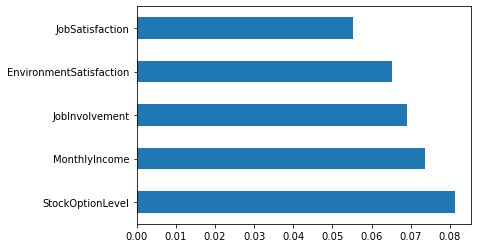

In [91]:
#predicted probability
y_pred_prob_rfc5 = rfc5.predict_proba(X_test)[:,1]

#plot the important features
feat_importances = pd.Series(rfc5.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')

### PDPBox plots

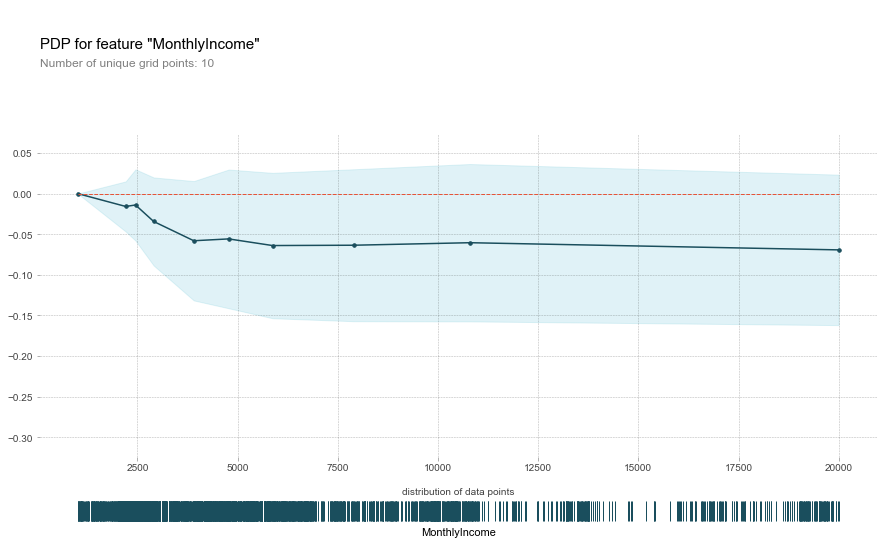

In [92]:
# PDPBox for the impact of monthly income on attrition

pdp_MonthlyIncome = pdp_isolate(model=rfc5, dataset=dfnew, model_features=x_columns,feature='MonthlyIncome')
fig, axes = pdp_plot(pdp_isolate_out=pdp_MonthlyIncome,feature_name='MonthlyIncome',plot_pts_dist=True)


The increase in monthly income decreases the likelyhood of attrition overall with a slight peak at 2500 and 4800. The greatest impact occurs after the 2500 dollar mark up to about 5500 dollars. Prior to 2500 dollars and after 4000 dollars there is minimal impact of attrition.

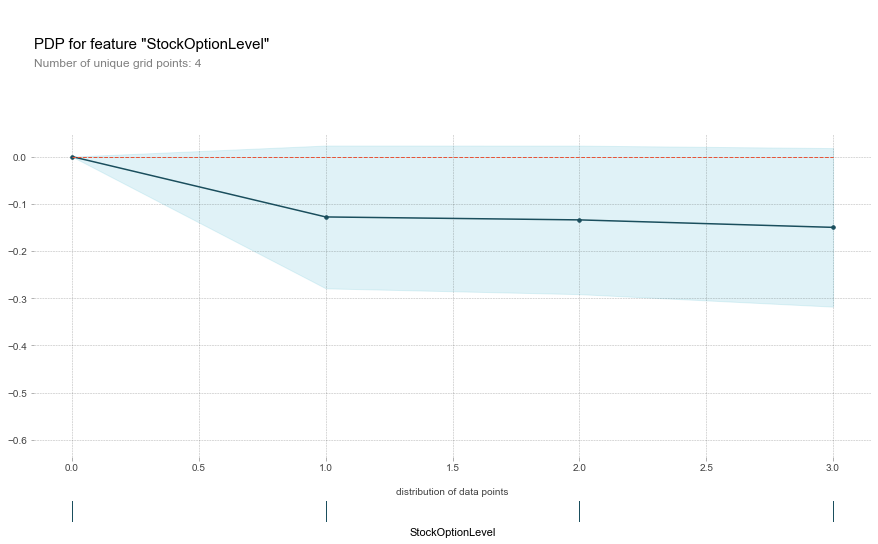

In [77]:
# PDPBox for the impact of stock option level on attrition

pdp_StockOptionLevel= pdp_isolate(model=rfc5, dataset=dfnew, model_features=x_columns,feature='StockOptionLevel')
fig, axes = pdp_plot(pdp_isolate_out=pdp_StockOptionLevel,feature_name='StockOptionLevel',plot_pts_dist=True)

As shown in the plot above, there is an overall decrease in likelyhood of attrition with the increase in stock option level, especially from level 0 to 1. After level 1 the impact is not as strong.

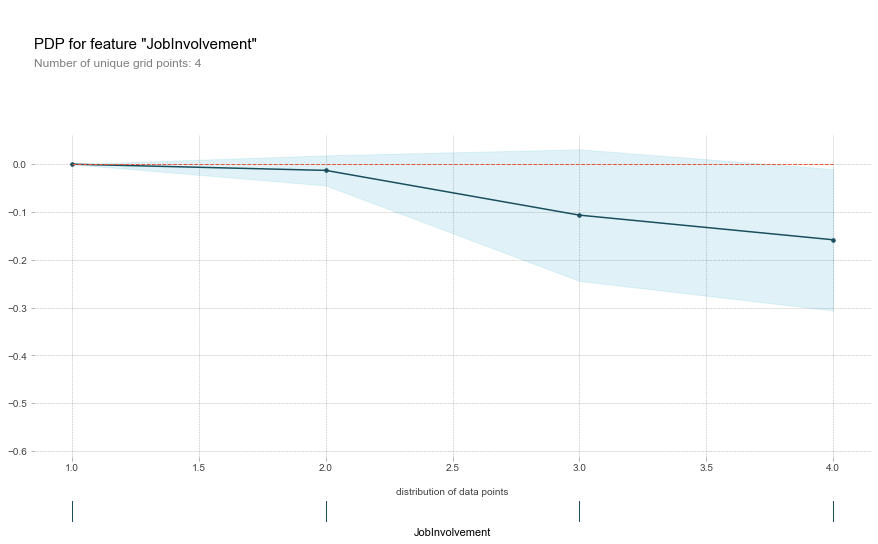

In [78]:
# PDPBox for the impact of job involvement on attrition

pdp_JobInvolvement = pdp_isolate(model=rfc5, dataset=dfnew, model_features=x_columns,feature='JobInvolvement')
fig, axes = pdp_plot(pdp_isolate_out=pdp_JobInvolvement,feature_name='JobInvolvement',plot_pts_dist=True)

There is a minimal decrease of attrition as job involvement increases from 1-2, then there is a significant decrease of attrition from the increased job involvement levels from 2 to 4.

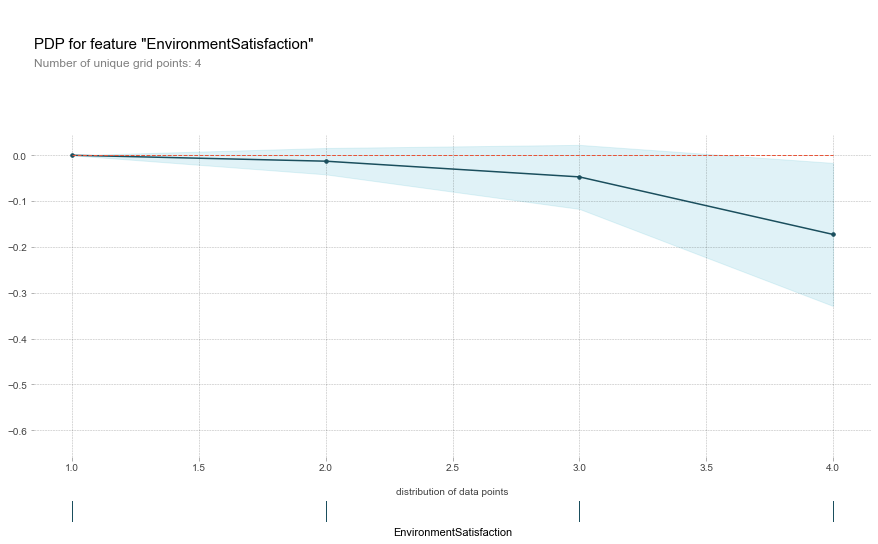

In [79]:
# PDPBox for the impact of environment satisfaction on attrition

pdp_EnvironmentSatisfaction = pdp_isolate(model=rfc5, dataset=dfnew, model_features=x_columns,feature='EnvironmentSatisfaction')
fig, axes = pdp_plot(pdp_isolate_out=pdp_EnvironmentSatisfaction,feature_name='EnvironmentSatisfaction',plot_pts_dist=True)

Initially the environment satisfaction has a slight decrease in attrition as it increases from level 1 to 2. From 2 to 3 there is a larger decrease and from 3 to 4 there is a significant decrease in attrition.

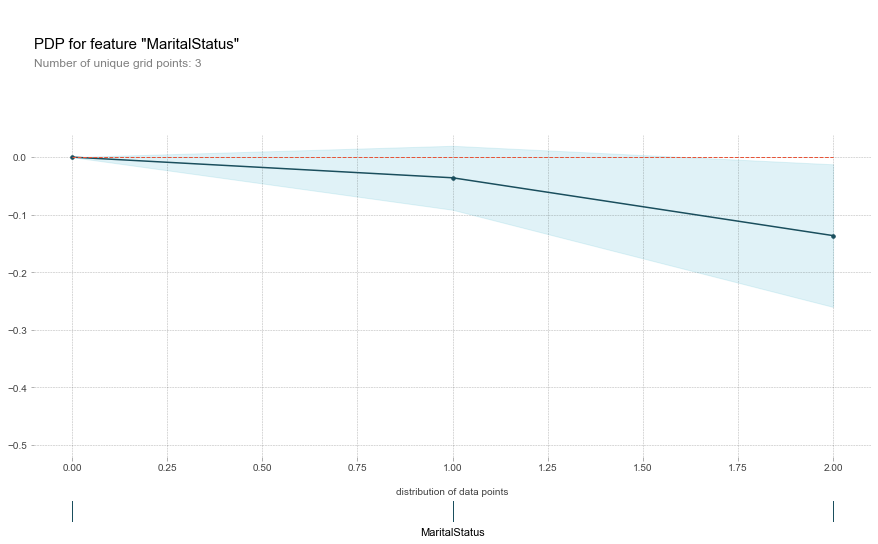

In [80]:
# PDPBox for the impact of MaritalStatus on attrition

pdp_MaritalStatus = pdp_isolate(model=rfc5, dataset=dfnew, model_features=x_columns,feature='MaritalStatus')
fig, axes = pdp_plot(pdp_isolate_out=pdp_MaritalStatus,feature_name='MaritalStatus',plot_pts_dist=True)

A divorced marital status does not appear to impact attrition. A status of single increased likelihood of attrition and married status decreased the likelihood.

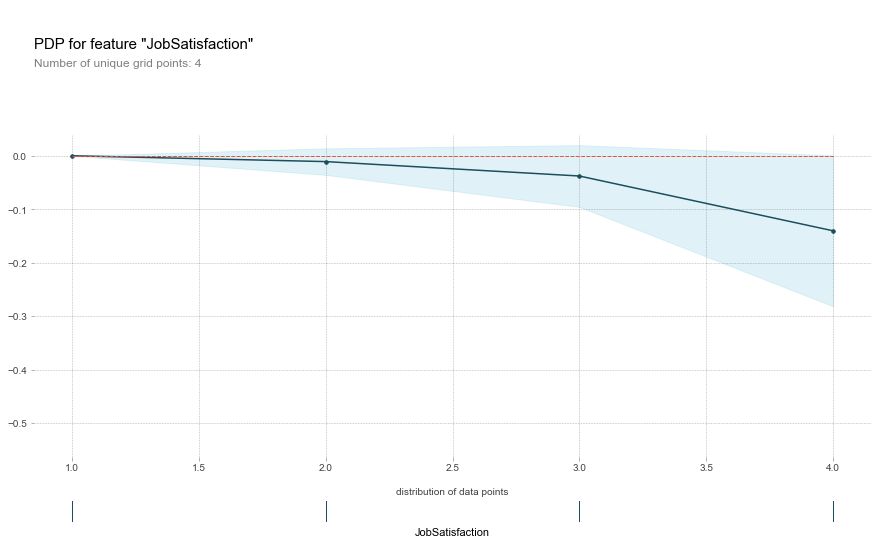

In [81]:
# PDPBox for the impact of jobsatisfaction on attrition

pdp_JobSatisfaction = pdp_isolate(model=rfc5, dataset=dfnew, model_features=x_columns,feature='JobSatisfaction')
fig, axes = pdp_plot(pdp_isolate_out=pdp_JobSatisfaction,feature_name='JobSatisfaction',plot_pts_dist=True)

Job satisfaction appears to decrease the likelihood of attrition, especially after the satisfaction passes a level of three.

## Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb1 = GaussianNB()
nb1.fit(X_train, y_train)
y_pred_nb1 = nb1.predict(X_test)

In [60]:
#confusion matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_nb1).ravel()
print(tn, fp, fn, tp)

confusion_matrix(y_test, y_pred_nb1)

262 84 87 307


array([[262,  84],
       [ 87, 307]])

In [61]:
#Accuracy, sensitivity & specificty
print("Accuracy = %s" %((tp+tn)/(tp+fn+tn+fp)))
print("Sensitivity = %s" %(tp/(tp+fn)))
print("Specificity = %s" %(tn/(tn+fp)))
    
#Precision, recall & F1_score
print(classification_report(y_test, y_pred_nb1))

Accuracy = 0.768918918918919
Sensitivity = 0.7791878172588832
Specificity = 0.7572254335260116
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       346
           1       0.79      0.78      0.78       394

    accuracy                           0.77       740
   macro avg       0.77      0.77      0.77       740
weighted avg       0.77      0.77      0.77       740



## KNN Model

In [62]:
# Task #6: Create a KNN Model and calculate its accuracy score

from sklearn.neighbors import KNeighborsClassifier 
knn1 = KNeighborsClassifier(n_neighbors=3) 
knn1.fit(X_train, y_train) 
y_pred_knn1 = knn1.predict(X_test)

In [63]:
#confusion matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn1).ravel()
print(tn, fp, fn, tp)

confusion_matrix(y_test, y_pred_knn1)

224 122 70 324


array([[224, 122],
       [ 70, 324]])

In [64]:
#Accuracy, sensitivity & specificty
print("Accuracy = %s" %((tp+tn)/(tp+fn+tn+fp)))
print("Sensitivity = %s" %(tp/(tp+fn)))
print("Specificity = %s" %(tn/(tn+fp)))

#Precision, recall & F1_score
print(classification_report(y_test, y_pred_knn1))

Accuracy = 0.7405405405405405
Sensitivity = 0.8223350253807107
Specificity = 0.6473988439306358
              precision    recall  f1-score   support

           0       0.76      0.65      0.70       346
           1       0.73      0.82      0.77       394

    accuracy                           0.74       740
   macro avg       0.74      0.73      0.74       740
weighted avg       0.74      0.74      0.74       740



AUC= 0.7951204483436518


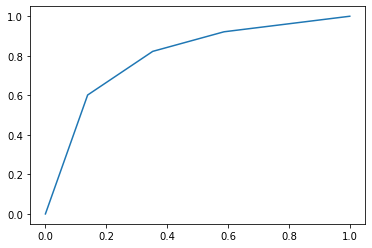

In [65]:
y_pred_knn2 = knn1.predict_proba(X_test)[:,1]
print("AUC=", roc_auc_score(y_test, y_pred_knn2))

# plot ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_knn2)
plt.plot(fpr, tpr)

## Neural Network

In [66]:
#Normalize input variables for performance

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_nn = scaler.transform(X_train)
X_test_nn = scaler.transform(X_test)

In [67]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(4,4,5))
mlp.fit(X_train_nn,y_train)
#prediction for test dataset
y_pred_mlp = mlp.predict(X_test)

AUC= 0.6479123265162408


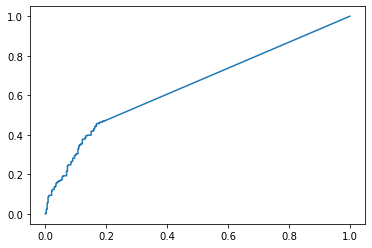

In [68]:
y_pred_nn2 = mlp.predict_proba(X_test)[:,1]
print("AUC=", roc_auc_score(y_test, y_pred_nn2))

# plot ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_nn2)
plt.plot(fpr, tpr)

In [69]:
#confusion matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_mlp).ravel()
print(tn, fp, fn, tp)

confusion_matrix(y_test, y_pred_mlp)

346 0 394 0


array([[346,   0],
       [394,   0]])

In [70]:
#Accuracy, sensitivity & specificty
print("Accuracy = %s" %((tp+tn)/(tp+fn+tn+fp)))
print("Sensitivity = %s" %(tp/(tp+fn)))
print("Specificity = %s" %(tn/(tn+fp)))

#Precision, recall & F1_score
print(classification_report(y_test, y_pred_mlp))

Accuracy = 0.46756756756756757
Sensitivity = 0.0
Specificity = 1.0
              precision    recall  f1-score   support

           0       0.47      1.00      0.64       346
           1       0.00      0.00      0.00       394

    accuracy                           0.47       740
   macro avg       0.23      0.50      0.32       740
weighted avg       0.22      0.47      0.30       740



## Support Vector Machine

In [82]:
from sklearn.svm import SVC

svc = SVC(C= 1.0, kernel='linear', probability=True)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

In [83]:
#confusion matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svc).ravel()
print(tn, fp, fn, tp)

confusion_matrix(y_test, y_pred_svc)

298 48 84 310


array([[298,  48],
       [ 84, 310]])

In [84]:
#Accuracy, sensitivity & specificty
print("Accuracy = %s" %((tp+tn)/(tp+fn+tn+fp)))
print("Sensitivity = %s" %(tp/(tp+fn)))
print("Specificity = %s" %(tn/(tn+fp)))

#Precision, recall & F1_score
print(classification_report(y_test, y_pred_svc))

Accuracy = 0.8216216216216217
Sensitivity = 0.7868020304568528
Specificity = 0.861271676300578
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       346
           1       0.87      0.79      0.82       394

    accuracy                           0.82       740
   macro avg       0.82      0.82      0.82       740
weighted avg       0.83      0.82      0.82       740



## ROC Comparison

In [85]:
prediction = dict()
prediction['Logistic'] = logreg.predict_proba(X_test)[:,1]
prediction['Decision Tree'] = clftree.predict_proba(X_test)[:,1]
prediction['Random Forest'] = rfc5.predict_proba(X_test)[:,1]
prediction['Naive Bayes'] = nb1.predict_proba(X_test)[:,1]
prediction['SVC'] = svc.predict_proba(X_test)[:,1]
prediction['Neural Network'] = y_pred_nn2 = mlp.predict_proba(X_test)[:,1]

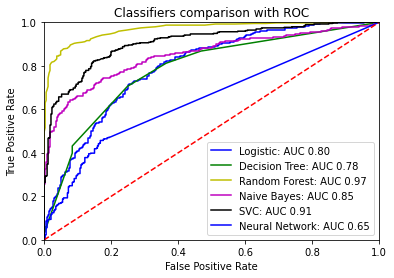

In [86]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
# plot ROC values in one plot

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k', 'b']
for model, predicted in prediction.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers comparison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()